[raiz] [5 3]  (corte X=5)
  [izq] [4 7]  (corte Y=7)
    [izq] [1 4]  (corte X=1)
    [der] [2 8]  (corte X=2)
  [der] [9 2]  (corte Y=2)
    [izq] [6 1]  (corte X=6)
    [der] [7 6]  (corte X=7)


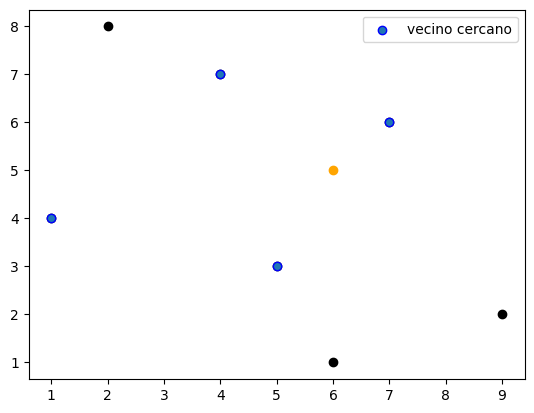

[raiz] [5 3 7]  (corte X=5)
  [izq] [1 6 2]  (corte Y=6)
    [izq] [2 3 7]  (corte Z=7)
      [izq] [3 5 4]  (corte X=3)
      [der] [1 4 9]  (corte X=1)
    [der] [4 7 5]  (corte Z=5)
      [izq] [2 8 1]  (corte X=2)
      [der] [3 9 5]  (corte X=3)
  [der] [7 6 2]  (corte Y=6)
    [izq] [6 1 8]  (corte Z=8)
      [izq] [9 2 3]  (corte X=9)
      [der] [9 4 8]  (corte X=9)
    [der] [6 8 3]  (corte Z=3)
      [izq] [5 7 1]  (corte X=5)
      [der] [8 9 6]  (corte X=8)


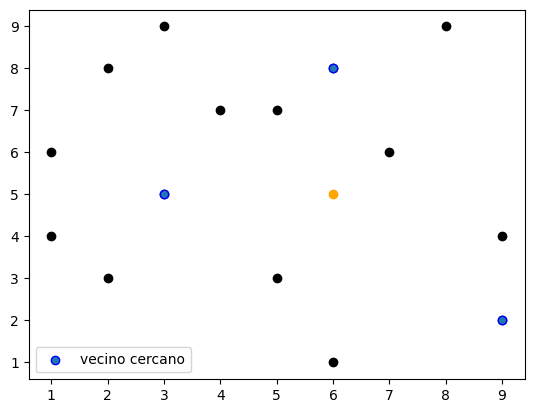

[[6. 8. 3.]
 [9. 2. 3.]
 [3. 5. 4.]]


In [48]:
import numpy as np
import matplotlib.pyplot as plt

#INSERTION-SORT(A, n)
#1  for i = 2 to n
#2      key = A[i]
#3      // Insert A[i] into the sorted subarray A[1 : i - 1].
#4      j = i - 1
#5      while j > 0 and A[j] > key
#6          A[j + 1] = A[j]
#7          j = j - 1
#8      A[j + 1] = key
# interesante insercion!

class TD_Tree():
    def __init__(self,k):
        self.k = k
        self.arbol = None
    class Nodo:
        def __init__(self,punto):
            self.punto = punto 
            self.izq = None
            self.der = None
    #------------------------------------------------
    def establecer_niveles(self,n):
        niveles = np.log2(n + 1)               # 2^niveles - 1 = datos
        self.k = np.ceil(niveles).astype(int)   # redondeo hacia arriba, la parte entera
    #------------------------------------------------
    def distancia(self,p1,p2):
        d = 0
        n = len(p1)
        for i in range(n):
            d =+ (p1[i] - p2[i])**2
        return d**.5
    # -----------------------------------------------------
    def ordenar(self,puntos,eje):
        m, n = puntos.shape
        for i in range(1,m):
            p_compare = puntos[i].copy()          #se entiende por range no contiene a n, asi guarda es equivalente con los algoritmos
            v_compare = p_compare[eje]
            j = i-1
            while j>=0 and puntos[j,eje]>v_compare:
                puntos[j+1] = puntos[j]
                j = j - 1
            puntos[j+1] = p_compare
        return puntos
    #--------------------------------------------------------
    def construir(self,puntos,nivel=0):
        n = len(puntos)
        if n==0:
            return None
        dimension = len(puntos[0])      # (a,b,c) 3 dimensiones
        eje = nivel % dimension         # 0%3  1%3  2%3
        ordenados = self.ordenar(puntos,eje)
        ind_mediana = n//2
        p_mediana = puntos[ind_mediana]
        nodo = self.Nodo(p_mediana)
        nodo.izq = self.construir(ordenados[:ind_mediana],nivel + 1)
        nodo.der = self.construir(ordenados[ind_mediana + 1 :],nivel + 1)
        return nodo  
    #------------------------------------------------------------
    def buscar(self,nodo,p,nivel=0,mejor=None):
        if nodo is None:
            return mejor
        k = len(p)
        eje = nivel % k
        if p[eje]<=nodo.punto[eje]:
            lado_move = nodo.izq
            lado_otro = nodo.der
        else:
            lado_move = nodo.der
            lado_otro = nodo.izq
        mejor = self.buscar(lado_move,p,nivel+1)
        d = self.distancia(p,nodo.punto)
        if mejor is None or d < mejor[0]:
            mejor = (d,nodo.punto)
        d_hiperplano = abs(p[eje] - nodo.punto[eje])
        if d_hiperplano < mejor[0]:
            mejor = self.buscar(lado_move,p,nivel + 1,mejor)
        return mejor
    #---------------------------------------------------------------
    def ordenar_reverse(self,d_vecinos):
        m = len(d_vecinos)
        for i in range(m-2,-1,-1):
            p_compare = d_vecinos[i]
            v_compare = p_compare[0]
            j = i + 1
            while j<m and d_vecinos[j][0]>v_compare:
                d_vecinos[j - 1] = d_vecinos[j]
                j = j + 1
            d_vecinos[j - 1] = p_compare
        return d_vecinos
    #----------------------------------------------------------------
    def buscar_k(self,nodo,p,k_vecinos,nivel=0,candidatos=None):   # ahora se buscan k vecinos
        if candidatos is None:
            candidatos = []
        if nodo is None:
            return candidatos
        k = len(p)
        eje = nivel % k
        if p[eje]<=nodo.punto[eje]:
            lado_move = nodo.izq
            lado_otro = nodo.der
        else:
            lado_move = nodo.der
            lado_otro = nodo.izq
        candidatos = self.buscar_k(lado_move,p,k_vecinos,nivel + 1,candidatos)
        d = self.distancia(p,nodo.punto)
        if len(candidatos)<k_vecinos:
            candidatos.append((d,nodo.punto))
            candidatos = self.ordenar_reverse(candidatos)
        elif d < candidatos[0][0]:
            candidatos[0] = (d,nodo.punto)
            candidatos = self.ordenar_reverse(candidatos)
        lleno = len(candidatos) == k_vecinos
        mayor_distancia = candidatos[0][0] if lleno else float('inf')
        d_hiperplano = abs(p[eje] - nodo.punto[eje])
        if  d_hiperplano < mayor_distancia:
            candidatos = self.buscar_k(lado_otro,p,k_vecinos,nivel+ 1,candidatos)
        return candidatos
    #---------------------------------------------------- 
    def buscar_vecino(self,arbol,p):   #(1.41, array([7,6]))
        candidatos = self.buscar(arbol,p) 
        vecinos_ = np.zeros((1,self.k)) 
        d = candidatos[0]
        vecinos_[0] = candidatos[1] 
        return vecinos_,d
    #----------------------------------------------------
    def buscar_k_vecinos(self,arbol,p,k):  # [(float,array),(float,array)..]
        candidatos = self.buscar_k(arbol,p,k)
        m = len(candidatos)
        vecinos_ = np.zeros((m,self.k))
        d = np.zeros((m,1))
        for i in range(m):
            d[i] = candidatos[i][0]
            vecinos_[i] = candidatos[i][1]
        return vecinos_,d
    #---------------------------------------------------
    def imprimir(self,nodo, nivel=0, rama="raiz"):
        if nodo is None:
            return
        k   = len(nodo.punto)
        eje = ["X","Y","Z","W"][nivel % k]
        print("  " * nivel + f"[{rama}] {nodo.punto}  (corte {eje}={nodo.punto[nivel%k]})")
        self.imprimir(nodo.izq, nivel + 1, "izq")
        self.imprimir(nodo.der, nivel + 1, "der")
    #-----------------------------------------------------------
    def imprimir_yo(self,nodo,nivel=0,rama="raiz"):
        if nodo is None:
            return
        k = len(nodo.punto)
        eje = ["X","Y","Z","W"][nivel % k]
        if rama == "raiz":
            print("\t"*self.k  + f"[{rama}] {nodo.punto} (corte {eje}={nodo.punto[nivel % k]})")
        if rama == "izq":
            print("\t"*(self.k-nivel) + f"[{rama}] {nodo.punto} (corte {eje}={nodo.punto[nivel % k]})")
        if rama == "der":
            print("\t"*self.k + f"[{rama}] {nodo.punto} (corte {eje}={nodo.punto[nivel % k]})"+"\t"*(self.k-nivel))
        self.imprimir_yo(nodo.izq,nivel+ 1,"izq")
        self.imprimir_yo(nodo.der,nivel+1,"der")
    #---------------------------------------
    def graficar(self,p_,vecinos,puntos):
        plt.scatter(puntos[:,0],puntos[:,1],color='black') 
        plt.scatter(p_[:,0],p_[:,1],color='orange')
        plt.scatter(vecinos[:,0],vecinos[:,1], edgecolor='blue',label='vecino cercano')
        plt.legend()
        plt.show()
        
if __name__=='__main__':
    td_tree = TD_Tree(2)
    puntos_2d =np.array ([
        [2,8], [5,3], [7,6], [1,4], [9,2], [4,7], [6,1]
    ])
    arbol = td_tree.construir(puntos_2d)
    td_tree.imprimir(arbol)
    p = (6,5)
    p_ = np.array([p])
    vecinos,d = td_tree.buscar_k_vecinos(arbol,p,4)
    td_tree.graficar(p_,vecinos,puntos_2d)
    puntos_3d = np.array([
        [2,8,1], [5,3,7], [7,6,2], [1,4,9], [9,2,3],
        [4,7,5], [6,1,8], [3,5,4], [8,9,6], [2,3,7],
        [6,8,3], [1,6,2], [9,4,8], [5,7,1], [3,9,5]
    ])
    td_tree_3 = TD_Tree(3)
    arbol_3d = td_tree_3.construir(puntos_3d)
    td_tree_3.imprimir(arbol_3d)
    p = (6,5,4)
    p_ = np.array([p])
    vecinos,d = td_tree_3.buscar_k_vecinos(arbol_3d,p,3)
    td_tree_3.graficar(p_,vecinos,puntos_3d)
    print(vecinos)